In [1]:
import torchvision
from torchvision import datasets, transforms

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset using PyTorch
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Dataset info
print("Number of training samples:", len(train_dataset))
print("Number of testing samples:", len(test_dataset))
print("Classes:", train_dataset.classes)



100%|██████████| 170M/170M [00:02<00:00, 68.4MB/s]


Number of training samples: 50000
Number of testing samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
import tensorflow as tf

# Load CIFAR-10 using TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Display shape info
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


/tmp/ipython-input-3-54138205.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(train_labels[i])  # convert from array to int


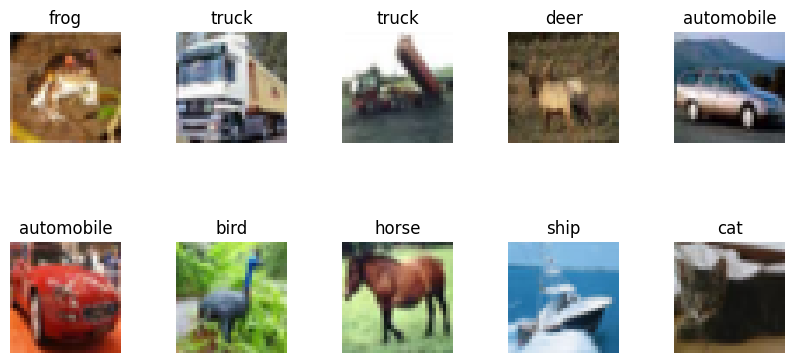

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot first 10 images with class names
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(10):
    axes[i].imshow(train_images[i])
    label_idx = int(train_labels[i])  # convert from array to int
    axes[i].set_title(class_names[label_idx])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()


In [4]:
from collections import Counter

# Flatten labels
train_labels_flat = train_labels.flatten()

# Count occurrences
label_counts = Counter(train_labels_flat)

# Display class distribution
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {label_counts[i]} images")


airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


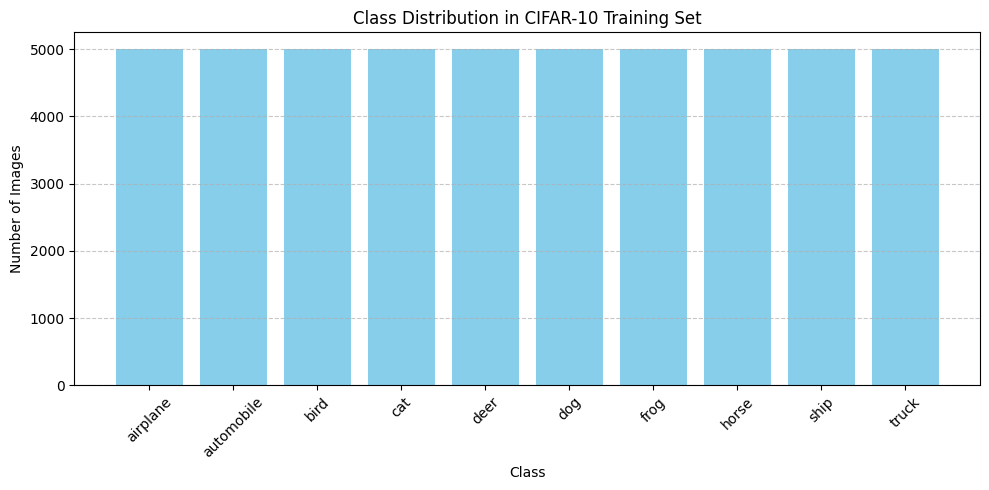

In [5]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, [label_counts[i] for i in range(10)], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:

import cv2
from sklearn.preprocessing import StandardScaler

# Load CIFAR-10 dataset using TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Function to convert to grayscale using OpenCV
def convert_to_grayscale(images):
    gray_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)

# Convert to grayscale
train_gray = convert_to_grayscale(train_images)
test_gray = convert_to_grayscale(test_images)

print("Grayscale shapes:")
print(f"Train: {train_gray.shape}, Test: {test_gray.shape}")

# Normalize pixel values to range [0, 1]
train_gray_norm = train_gray.astype('float32') / 255.0
test_gray_norm = test_gray.astype('float32') / 255.0

# Flatten images (from 32x32 → 1024)
train_gray_flat = train_gray_norm.reshape((train_gray_norm.shape[0], -1))
test_gray_flat = test_gray_norm.reshape((test_gray_norm.shape[0], -1))

print("Flattened shapes:")
print(f"Train: {train_gray_flat.shape}, Test: {test_gray_flat.shape}")


Grayscale shapes:
Train: (50000, 32, 32), Test: (10000, 32, 32)
Flattened shapes:
Train: (50000, 1024), Test: (10000, 1024)


In [7]:
from sklearn.decomposition import PCA

# Set number of principal components (e.g., retain 95% variance or choose fixed number)
n_components = 300  # You can also try: n_components=0.95 to retain 95% variance

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both train and test
train_pca = pca.fit_transform(train_gray_flat)
test_pca = pca.transform(test_gray_flat)

# Check shapes after PCA
print("After PCA dimensionality reduction:")
print(f"Train shape: {train_pca.shape}")
print(f"Test shape: {test_pca.shape}")


After PCA dimensionality reduction:
Train shape: (50000, 300)
Test shape: (10000, 300)


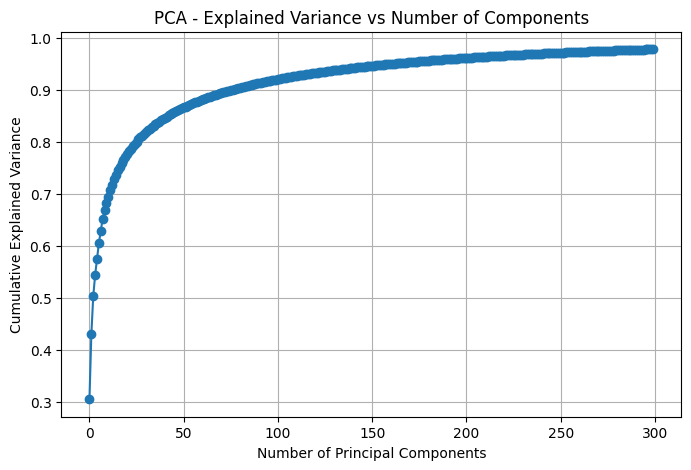

In [8]:

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.show()



Decision Tree Accuracy on Test Set: 0.2138

Classification Report:
               precision    recall  f1-score   support

    airplane       0.21      0.21      0.21      1000
  automobile       0.24      0.23      0.24      1000
        bird       0.18      0.19      0.19      1000
         cat       0.16      0.16      0.16      1000
        deer       0.19      0.20      0.20      1000
         dog       0.18      0.18      0.18      1000
        frog       0.22      0.23      0.22      1000
       horse       0.20      0.18      0.19      1000
        ship       0.29      0.30      0.29      1000
       truck       0.27      0.25      0.26      1000

    accuracy                           0.21     10000
   macro avg       0.21      0.21      0.21     10000
weighted avg       0.21      0.21      0.21     10000



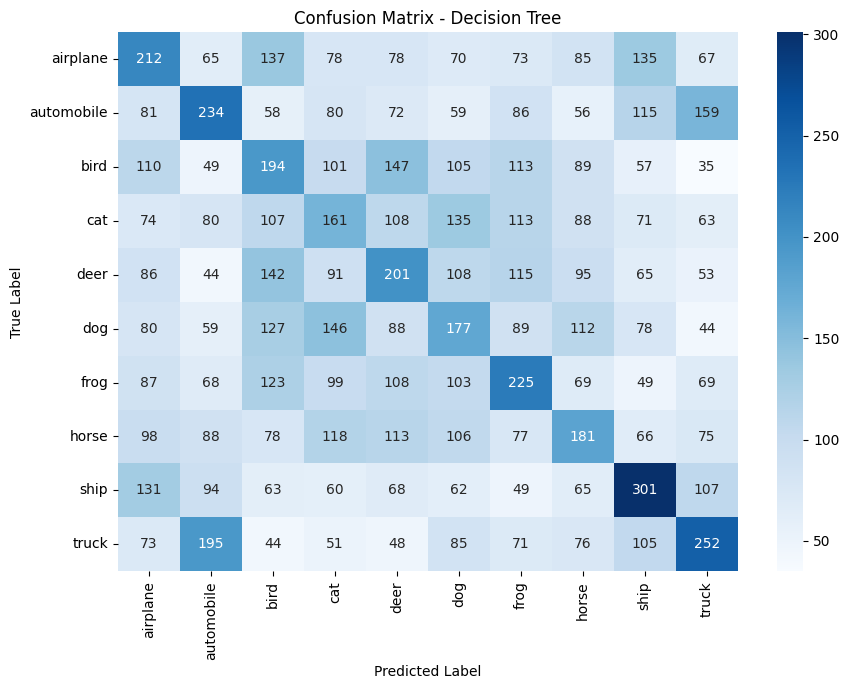

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a baseline Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(train_pca, train_labels.ravel())  # Flatten labels to 1D

# Predict on the test set
test_preds = dt_model.predict(test_pca)

# Evaluate the model
accuracy = accuracy_score(test_labels, test_preds)
print(f"\nDecision Tree Accuracy on Test Set: {accuracy:.4f}\n")

# Detailed performance report
print("Classification Report:\n", classification_report(test_labels, test_preds, target_names=class_names))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Random Forest Accuracy on Test Set: 0.3884

Classification Report:
               precision    recall  f1-score   support

    airplane       0.44      0.35      0.39      1000
  automobile       0.42      0.50      0.46      1000
        bird       0.33      0.29      0.31      1000
         cat       0.29      0.20      0.24      1000
        deer       0.34      0.35      0.34      1000
         dog       0.36      0.36      0.36      1000
        frog       0.40      0.43      0.42      1000
       horse       0.40      0.36      0.38      1000
        ship       0.46      0.55      0.50      1000
       truck       0.40      0.50      0.44      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



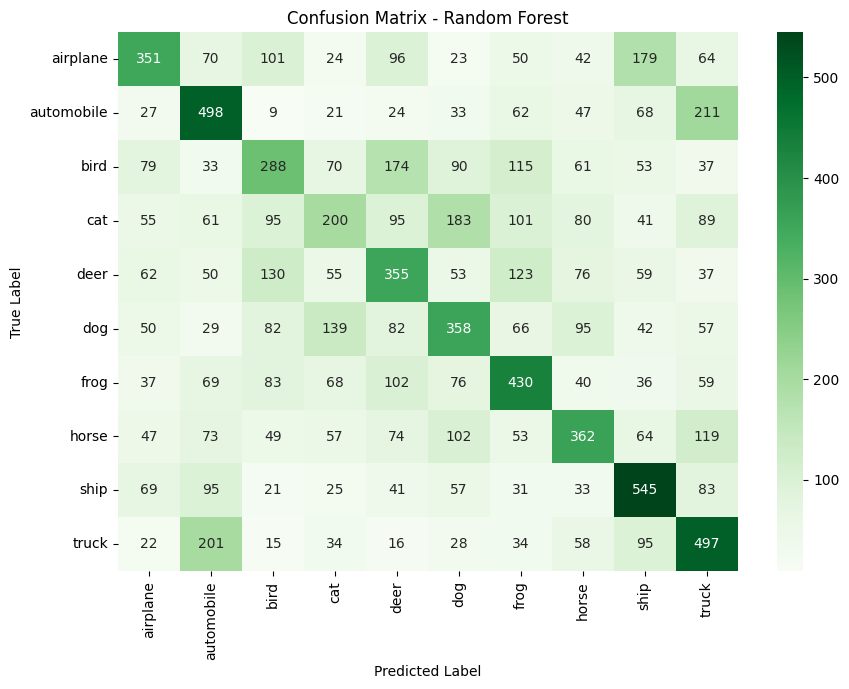

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=300,         # Number of trees
    max_depth=None,           # Allow full depth
    random_state=42,
    n_jobs=-1                 # Use all CPU cores
)

# Train the model
rf_model.fit(train_pca, train_labels.ravel())

# Predict on test set
rf_preds = rf_model.predict(test_pca)

# Evaluate performance
rf_accuracy = accuracy_score(test_labels, rf_preds)
print(f"\nRandom Forest Accuracy on Test Set: {rf_accuracy:.4f}\n")

# Classification report
print("Classification Report:\n", classification_report(test_labels, rf_preds, target_names=class_names))

# Confusion matrix
cm_rf = confusion_matrix(test_labels, rf_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [11]:
import joblib


In [12]:
# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


In [13]:
# Flatten true labels to match shape
true_labels = test_labels.flatten()

# Identify indices where prediction != true label
misclassified_idx = np.where(test_preds != true_labels)[0]

print(f"Total misclassified examples: {len(misclassified_idx)}")

Total misclassified examples: 7862


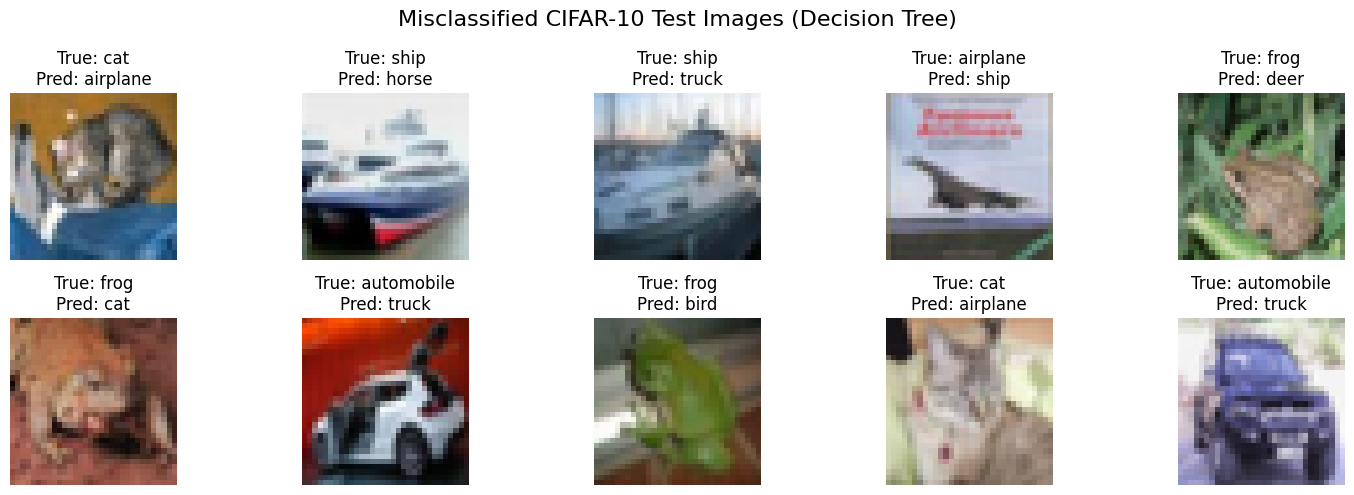

In [14]:
# Plot first 10 misclassified images
num_images = 10
plt.figure(figsize=(15, 5))

for i, idx in enumerate(misclassified_idx[:num_images]):
    plt.subplot(2, 5, i + 1)
    # Show original test image (convert grayscale back to image if needed)
    plt.imshow(test_images[idx])  # If grayscale: use cmap='gray'
    plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[test_preds[idx]]}")
    plt.axis('off')

plt.suptitle("Misclassified CIFAR-10 Test Images (Decision Tree)", fontsize=16)
plt.tight_layout()
plt.show()

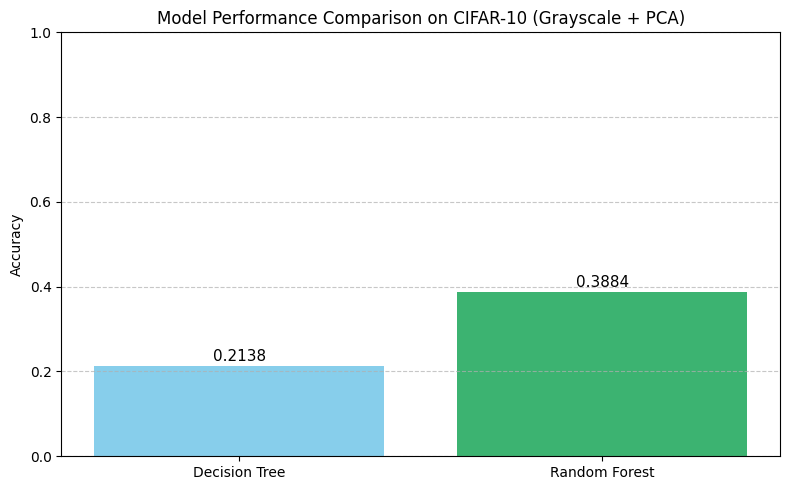

In [15]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
model_names = ['Decision Tree', 'Random Forest']
accuracies = [accuracy, rf_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'mediumseagreen', 'mediumpurple'])

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{acc:.4f}", ha='center', fontsize=11)

# Aesthetic settings
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison on CIFAR-10 (Grayscale + PCA)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [17]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer: 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.3401 - loss: 1.7904 - val_accuracy: 0.5149 - val_loss: 1.3475
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.5679 - loss: 1.2156 - val_accuracy: 0.6167 - val_loss: 1.0704
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6346 - loss: 1.0315 - val_accuracy: 0.6560 - val_loss: 0.9910
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6717 - loss: 0.9327 - val_accuracy: 0.6762 - val_loss: 0.9282
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7029 - loss: 0.8453 - val_accuracy: 0.6511 - val_loss: 1.0076
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7189 - loss: 0.7985 - val_accuracy: 0.6924 - val_loss: 0.8874
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7354 - loss: 0.7451 - val_accuracy: 0.7116 - val_loss: 0.8475
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.7539 -

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 5s - 15ms/step - accuracy: 0.7030 - loss: 0.8690

Test accuracy: 0.7030


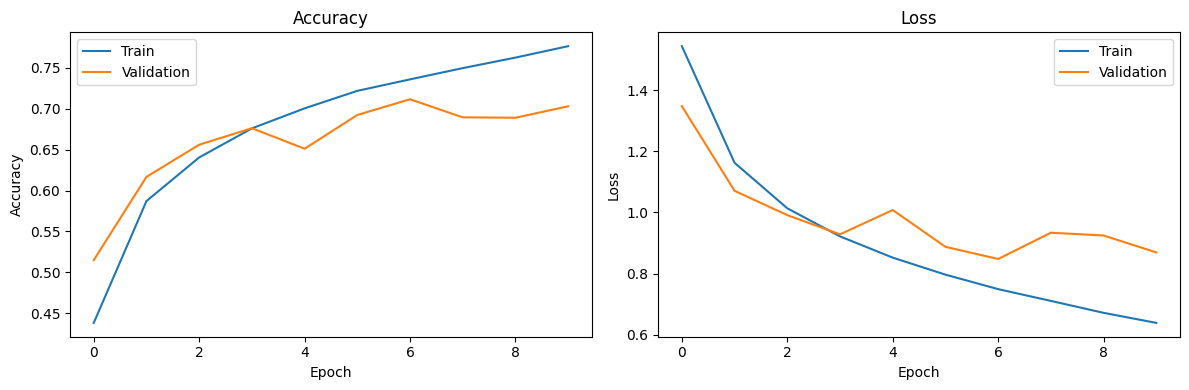

In [22]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


/tmp/ipython-input-23-2668489073.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[int(test_labels[i])]}")


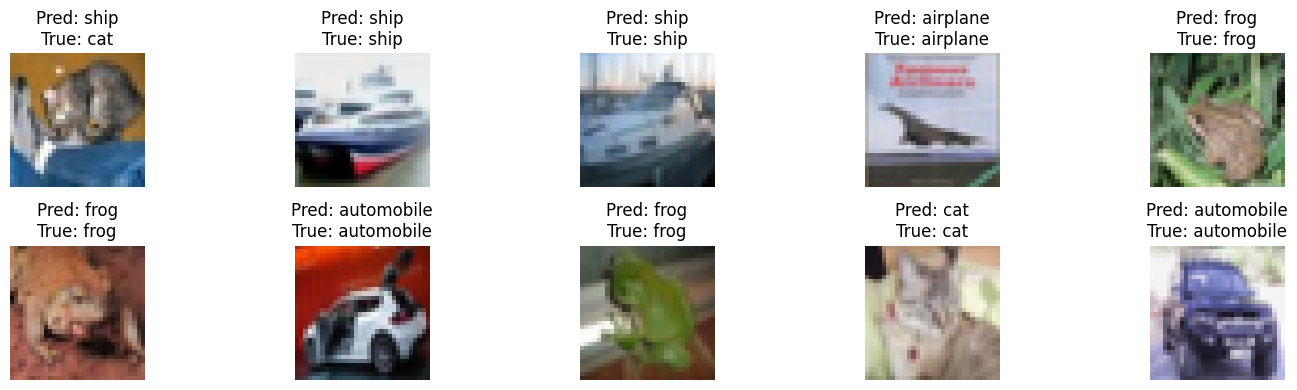

In [23]:
import numpy as np

# Apply softmax to logits to get class probabilities
probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)

# Plot first 10 test images with predictions
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[int(test_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

🔍 Random Forest Accuracy: 0.3884
🔍 CNN Accuracy:           0.7030

📄 Classification Report - Random Forest
              precision    recall  f1-score   support

    airplane       0.44      0.35      0.39      1000
  automobile       0.42      0.50      0.46      1000
        bird       0.33      0.29      0.31      1000
         cat       0.29      0.20      0.24      1000
        deer       0.34      0.35      0.34      1000
         dog       0.36      0.36      0.36      1000
        frog       0.40      0.43      0.42      1000
       horse       0.40      0.36      0.38      1000
        ship       0.46      0.55      0.50      1000
       truck       0.40      0.50      0.44      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000


📄 Classification Report - CNN
              precision    recall  f1-score   support

    a

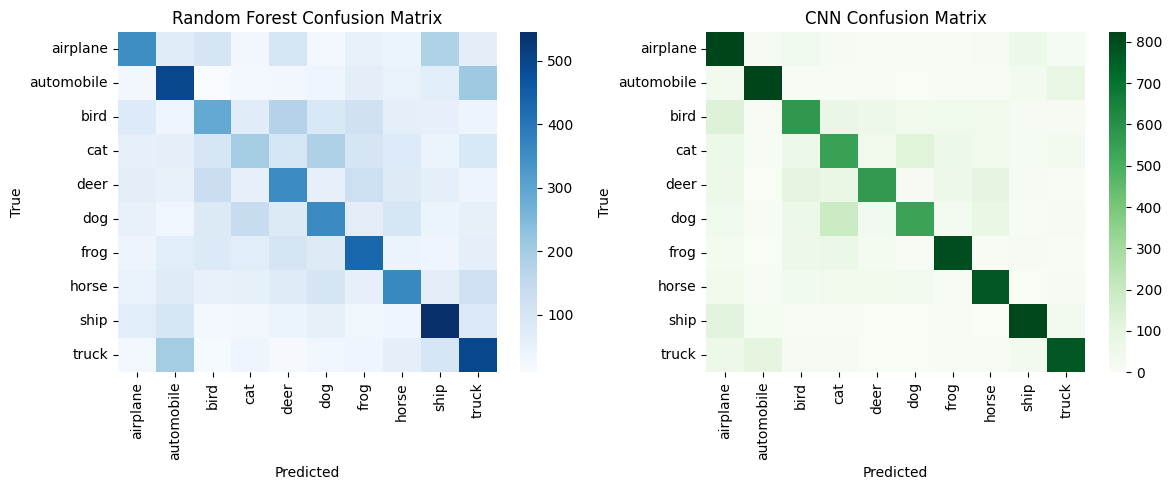

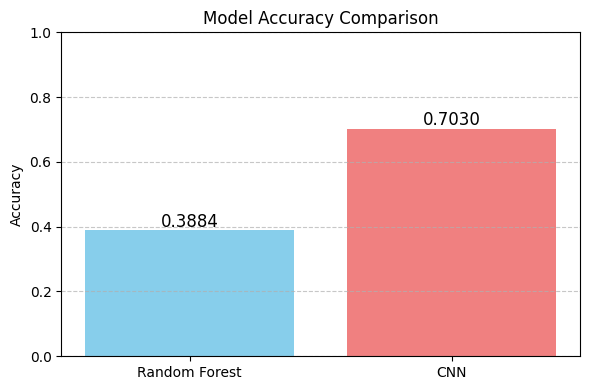

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the CNN model
cnn_preds = np.argmax(model.predict(test_images), axis=-1)

# 6. Accuracy Comparison
rf_acc = accuracy_score(test_labels, rf_preds)
cnn_acc = accuracy_score(test_labels, cnn_preds)

print(f"\n🔍 Random Forest Accuracy: {rf_acc:.4f}")
print(f"🔍 CNN Accuracy:           {cnn_acc:.4f}")

# 7. Classification Reports
print("\n📄 Classification Report - Random Forest")
print(classification_report(test_labels, rf_preds, target_names=class_names))

print("\n📄 Classification Report - CNN")
print(classification_report(test_labels, cnn_preds, target_names=class_names))

# 8. Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(test_labels, rf_preds), annot=False, cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(test_labels, cnn_preds), annot=False, cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

# 9. Accuracy Comparison Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Random Forest', 'CNN'], [rf_acc, cnn_acc], color=['skyblue', 'lightcoral'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.4f}", ha='center', fontsize=12)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()